# Reading and plotting data in Python

## What's the difference between random image and brain image?

<img src="images/doge.jpg" width="180"> <img src="images/mri.png" width="170">

## Image plotting

### Tasks (part I):

1. Load doge image from data folder
2. Plot doge image
3. Print dimensions of the image
4. Select one channel of the image and plot it
5. Change colormap of this image

In [23]:
# Loading libraries
import matplotlib.pyplot as plt # General plotting
import matplotlib.image as mpimg # Loading img files

import numpy as np # Matrix operations

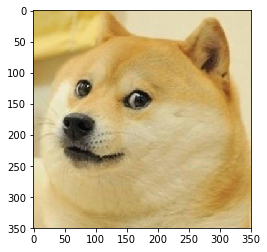

In [128]:
# Loading doge file
doge = mpimg.imread('images/doge.jpg')

# Plot doge image
plt.imshow(doge)

In [130]:
# Print dimensions of the image
doge.shape

(350, 350, 3)

RGB - three channels (R - red, G - green, B - blue). A channel inis the grayscale image of the same size as a color image, made of just one of these primary colors.

In [155]:
# Select one channel of the image and plot it
doge[:,:,0].shape

(350, 350)

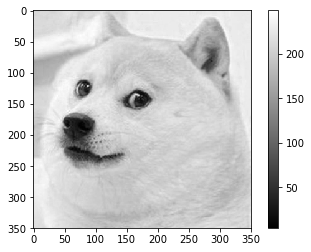

In [154]:
# Change colormap of this image
plt.imshow(doge[:,:,0], cmap='gray')
plt.colorbar()

### Tasks (part II):
1. Load and plot cat image
2. Change 2D images to 1D vectors
3. Plot distribution of cat and doge images intensity on one histogram
3. Plot relationship between doge and cat as matplotlib scatterplot
4. Plot relationship between doge and cat as seaborn regplot
5. Calculate Pearson's correlation between cat and doge
5. Add (or multiply) doge and cat and plot them with imshow

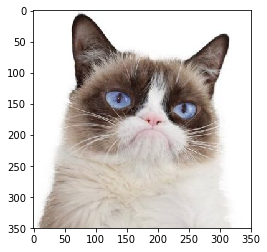

In [157]:
# Loading amd plotting cat file
cat = mpimg.imread('images/cat.jpg')
plt.imshow(cat)

In [158]:
cat.shape

(350, 350, 3)

In [170]:
# Make 2D array flat!
doge_flat = doge[:,:,0].flatten()
cat_flat = cat[:,:,0].flatten()
print(doge_flat.shape)
print(cat_flat.shape)

(122500,)
(122500,)


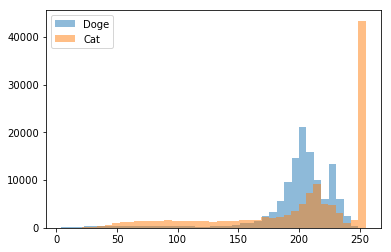

In [185]:
# Plot distribution of cat and doge images intensity on one histogram
plt.hist(doge_flat, bins=40, alpha=0.5)
plt.hist(cat_flat, bins=40, alpha=0.5)
plt.legend(['Doge', 'Cat'])

Text(0.5, 0, 'Dog')

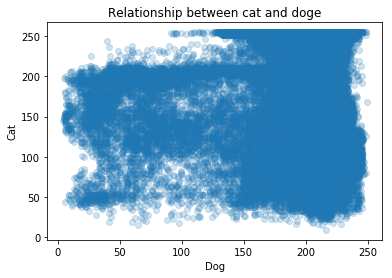

In [176]:
# Plot relationship between doge and cat as matplotlib scatterplot
plt.scatter(x=doge_flat, y=cat_flat, alpha=0.2)
plt.title('Relationship between cat and doge')
plt.ylabel('Cat')
plt.xlabel('Dog')

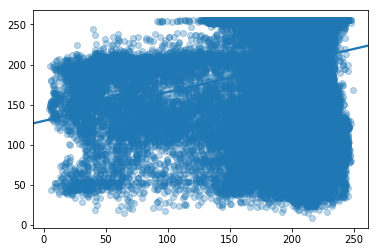

In [179]:
# Plot relationship between doge and cat as seaborn regplot
import seaborn as sns

sns.regplot(x=doge_flat, y=cat_flat, scatter_kws={'alpha':0.3})

In [187]:
# Calculate Pearson's correlation between cat and doge
from scipy import stats

cor = stats.pearsonr(x=doge_flat, y=cat_flat)
print(cor)

(0.21482020937138435, 0.0)


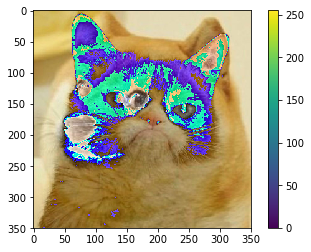

In [194]:
# Add (or multiply) doge and cat and plot them with imshow
plt.imshow(doge+cat)
plt.colorbar()

## How to plot brains?

<img src="images/brain_images.png" width="800"> 

## Structural MRI images plotting

### Tasks (part III):

1. Load structural T1 file
2. Print type of the data
3. Print dimensions of T1 file
4. Print T1 image in Nilearn
5. Change colormap of image

In [71]:
import nibabel as nib
from nilearn import plotting, image

In [66]:
# Load structural T1 file
t1_path = 'data/sub-01_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz'
t1_file = image.load_img(t1_path)

In [196]:
# Print dimensions of T1 file
t1_file.shape

(193, 229, 193)

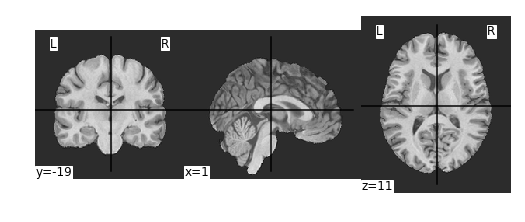

In [198]:
# Print T1 image in Nilearn (use plotting.plot_img)
# Change colormap of image 
plotting.plot_img(t1_file, cmap='gray')

## Functional MRI images plotting

### Tasks (part IV):

1. Load structural fMRI file
2. Print dimensions of fMRI file
3. Select one timepoint of fMRI image and plot it in nilearn
4. Convert nibabel file to numpy array
5. Plot one timepoint of numpy array with imshow
4. Plot timeseries of few voxels
5. Plot relationship between two random voxels

In [199]:
# Loading fMRI file
fmri_path = 'data/sub-01_ses-1_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
fmri_file = image.load_img(fmri_path)

In [201]:
# Print dimensions of fMRI file
fmri_file.shape

(65, 77, 56, 50)

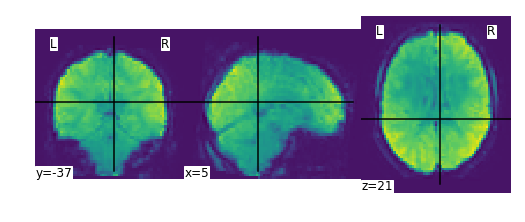

In [204]:
# Select one timepoint of fMRI image and plot it in nilearn
fmri_s1 = image.index_img(fmri_path, 20)

# Plot
plotting.plot_img(fmri_s1)

In [210]:
# Convert nibabel file to numpy array
fmri_file_array = fmri_file.get_data()

# Check type and dimensions
fmri_file_array[:,:,:,3].shape

(65, 77, 56)

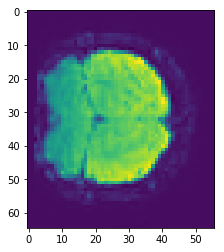

In [216]:
# Plot one timepoint of numpy array with imshow
plt.imshow(fmri_file_array[:,20,:,0])

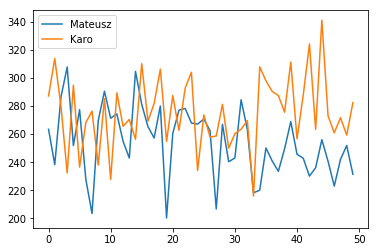

In [220]:
# Plot timeseries of few voxels
ts1 = fmri_file_array[20,10,5,:]
ts2 = fmri_file_array[30,20,5,:]

plt.plot(ts1)
plt.plot(ts2)
plt.legend(['Mateusz', 'Karo'])

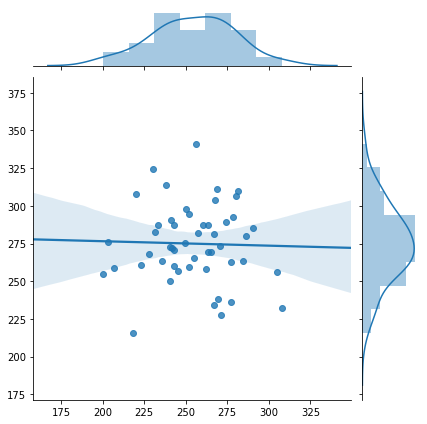

In [224]:
# Plot relationship between two random voxels
sns.jointplot(ts1, ts2, kind='reg')

In [225]:
stats.pearsonr(ts1, ts2)

(-0.028209438813113327, 0.8458123557392466)

## Statistical maps plotting

### Tasks (part IV):

1. Load statistical zmap
2. Print dimensions of zmap file
3. Plot zmap on glass brain
4. Plot zmap on brain slices
5. Plot zmap on structural image

In [227]:
# Load statistical zmap
zmap_path = 'data/sub-01_ses-1_task-dualnback_bold_space-MNI152NLin2009cAsym_preproc_2b_minus_1b_zmap.nii.gz'
zmap_file = image.load_img(zmap_path)

In [228]:
# Print dimensions of zmap file
zmap_file.shape

(65, 77, 56)

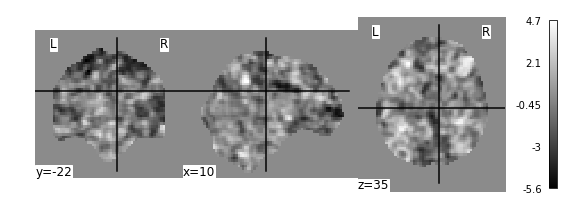

In [233]:
# Plot zmap

plotting.plot_img(zmap_file, colorbar=True, cmap='gray')

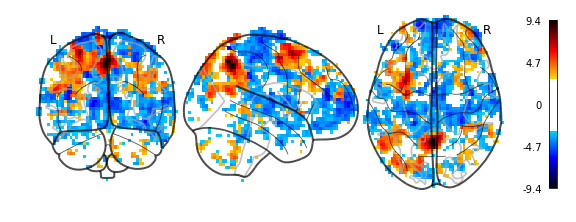

In [240]:
# Plot zmap on glass brain (plotting.plot_glass_brain,  plot_abs=False)
plotting.plot_glass_brain(zmap_file, plot_abs=False, colorbar=True, threshold=3)

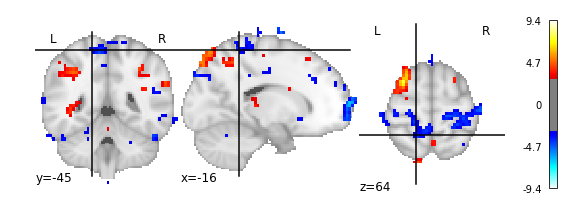

In [242]:
# Plot zmap on brain slices (plotting.plot_stat_map)
plotting.plot_stat_map(zmap_file, colorbar=True, threshold=3)

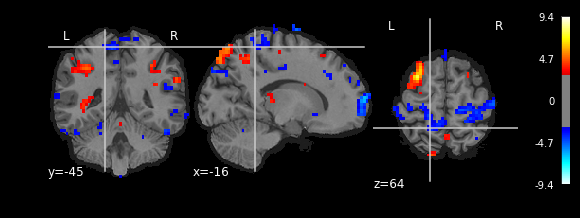

In [243]:
# Plot zmap on structural image (bg_img=)
plotting.plot_stat_map(zmap_file, colorbar=True, threshold=3, bg_img=t1_file)